# Signs of Smoking: Classifying Smokers Using Biological Health Indicators

Group 005-36: Elena Greenall, Noah Hynds, Dillon Li

### **Introduction**
Despite the knowledge that smoking harms nearly every organ in the human body (NIH, 2022), the prevalence of Canadian cigarette smoking in 2020 was 10% [Health Canada, n.d.). Nicotine, contained within cigarettes, causes a decrease in the levels of high density lipoprotein (HDL) (CDC, 2023), which raises the risk of heart disease. Further it causes an increase in low density lipoprotein levels (LDL) (CDC, 2023), which assist in flushing the body of cholesterol (Rao, 2013). In addition, nicotine increases blood glucose concentration (CDC, 2022), as well as increased triglyceride levels (van der Plas, 2023). As such, the goal of this project will be to use these biological indicators to classify patients based on their probability of being a smoker.  


The question we will aim to answer is:<em> is a new patient likely to be a smoker, based on LDL/HDL level, fasting blood sugar level, and triglyceride levels? <em>


We will use the Body Signal of Smoking dataset from Kaggle, by Kukuroo3. The dataset contains basic biological health data of smokers and non-smokers. Due to the large number of predictor variables contained within this dataset, we have chosen to focus on LDL/HDL level, fasting blood sugar and triglyceride levels as our research has revealed their relevance to smoking. 

### **Preliminary Exploratory Data Analysis**

In [2]:
#the first step is to import the necessary libraries
library(tidyverse)
library(tidymodels)
library(RColorBrewer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Rows: 55692 Columns: 27
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): gender, oral, tartar
dbl (24): ID, age, height(cm), weight(kg), waist(cm), eyesight(left), eyesig...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID    gender age height_cm weight_kg waist_cm eyesight_left
1      0    F      40  155       60         81.3    1.2          
2      1    F      40  160       60         81.0    0.8          
3      2    M      55  170       60         80.0    0.8          
4      3    M      40  165       70         88.0    1.5          
5      4    F      40  155       60         86.0    1.0          
6      5    M      30  180       75         85.0    1.2          
7      6    M      40  160       60         85.5    1.0          
8      7    M      45  165       90         96.0    1.2          
9      9    F      50  150       60         85.0    0.7          
10    10    M      45  175       75         89.0    1.0          
11    11    M      30  175       65         89.0    1.5          
12    12    M      30  170       75         87.0    1.2          
13    13    M      35  170       70         81.0    1.5          
14    14    F      40  155       45         59.0    1.5          
15    15    F      45  165       75        108.0    1.2          
16    16    F      40  170       55         68.0    1.0          
17    18    F      60  150       50         68.2    1.0          
18    19    M      35  165       70         87.5    1.0          
19    21    M      60  165       65         79.0    1.0          
20    22    F      45  155       50         73.0    0.7          
21    23    M      30  170       50         68.0    0.7          
22    26    M      40  180       85         82.0    1.5          
23    28    M      55  175       60         75.0    1.0          
24    30    M      35  170       65         84.6    1.0          
25    31    M      45  175       80         91.0    1.0          
26    32    M      35  180       90         90.0    1.5          
27    33    M      25  175       85         95.4    1.5          
28    34    M      60  160       70         91.0    0.7          
29    35    F      45  165       60         76.0    0.7          
30    36    M      45  170       65         82.0    1.2          
⋮     ⋮     ⋮      ⋮   ⋮         ⋮         ⋮        ⋮            
55663 55489 M      55  175       85         99.0    1.5          
55664 55516 F      45  155       55         80.0    0.9          
55665 55517 F      50  155       65         86.5    0.7          
55666 55534 F      55  150       50         75.0    1.0          
55667 55553 M      25  170       80         90.0    1.5          
55668 55554 F      50  150       60         68.5    0.9          
55669 55569 M      40  170       85         99.1    1.5          
55670 55572 M      60  160       60         79.0    1.0          
55671 55573 M      50  175       75         91.0    0.6          
55672 55591 F      60  160       85        109.0    1.0          
55673 55592 F      50  160       55         84.0    1.0          
55674 55596 M      75  155       45         68.0    0.6          
55675 55603 F      45  155       55         74.0    0.5          
55676 55607 M      30  170       70         88.8    1.0          
55677 55609 F      40  150       45         72.0    1.0          
55678 55621 F      50  155       65         86.5    0.8          
55679 55627 M      50  160       65         83.7    0.9          
55680 55632 M      45  180       90         92.0    1.2          
55681 55633 F      60  150       50         79.8    0.8          
55682 55652 F      45  160       65         75.0    1.2          
55683 55655 M      20  175       75         85.0    0.9          
55684 55663 M      40  180       85         86.5    1.2          
55685 55666 M      40  170       65         85.0    1.2          
55686 55671 M      40  170       80         90.5    1.2          
55687 55673 F      60  150       50         75.0    1.0          
55688 55676 F      40  170       65         75.0    0.9          
55689 55681 F      45  160       50         70.0    1.2          
55690 55683 F      55  160       50         68.5    1.0          
55691 55684 M      60  165       60         78

smoking mean(HDL) mean(LDL) mean(fasting_blood_sugar) mean(triglyceride)
1 0       59.16092  116.6501   97.80559                 113.2446          
2 1       53.79443  113.1931  102.17502                 152.2484

Warning message:
“Removed 21 rows containing missing values (`geom_point()`).”


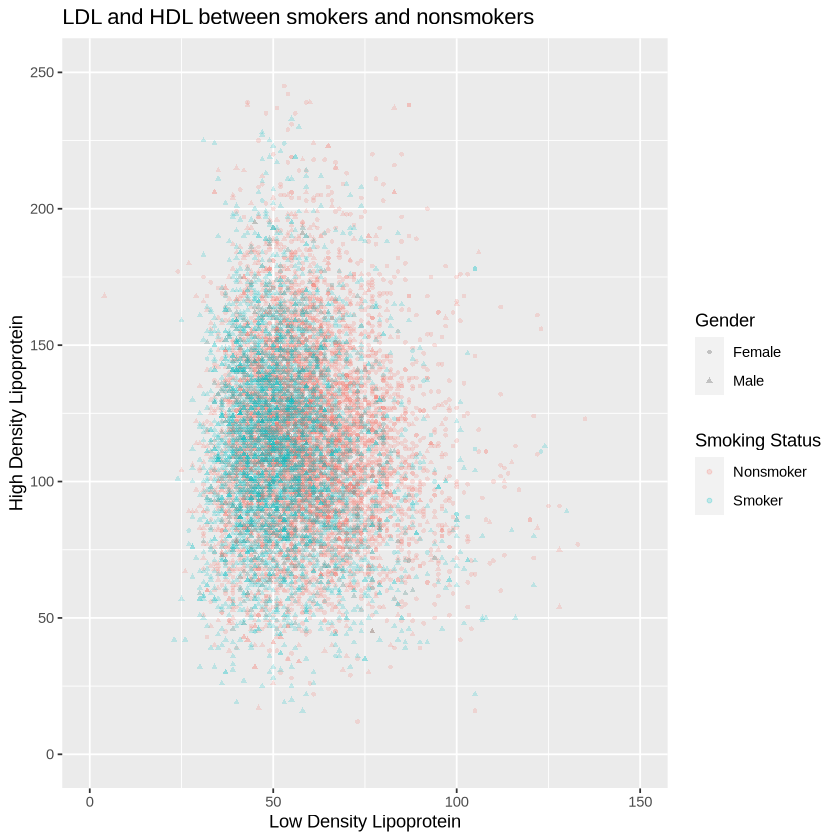

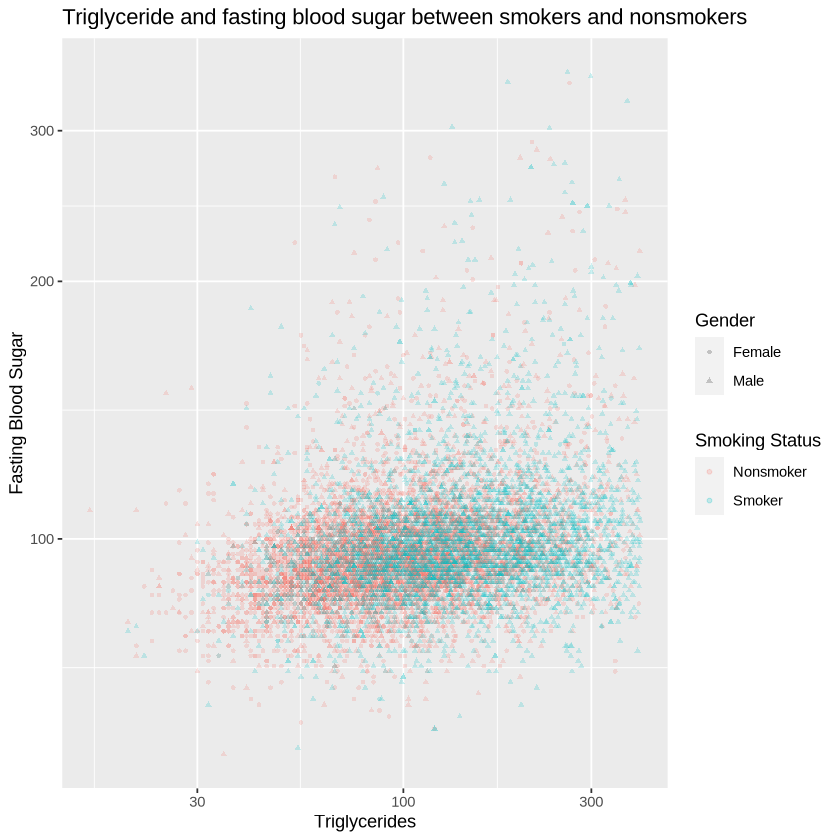

In [3]:
#next the dataset can be loaded and tidied
smoking_df <- read_csv("data/smoking.csv")
colnames(smoking_df) <- c("ID", "gender","age", "height_cm", "weight_kg", "waist_cm", "eyesight_left", "eyesight_right", "hearing_left", "hearing_right", "systolic", "relaxation", "fasting_blood_sugar", "cholesterol", "triglyceride", "HDL", "LDL", "hemoglobin", "urine_protein", "serum_creatine", "AST", "ALT", "Gtp", "oral", "dental_carries", "tartar", "smoking")
smoking_df <- mutate(smoking_df, smoking = as_factor(smoking))

smoking_df

#select only the predictors we are interested in
smoking_df <- select(smoking_df, gender, HDL, LDL, triglyceride, fasting_blood_sugar, smoking)

#split data into training and test data
smoking_split <- initial_split(smoking_df, prop = 0.2, strata = smoking)  
smoking_training_data <- training(smoking_split)
smoking_testing_data <- testing(smoking_split)

#create a summary of our predictors 
smoking_summary <- smoking_training_data |> group_by(smoking) |> summarize(mean(HDL), mean(LDL), mean(fasting_blood_sugar), mean(triglyceride))
smoking_summary

#create a plot of HDL vs LDL
smoking_training_plot_HDL_LDL <- ggplot(smoking_training_data, aes(x = HDL, y = LDL)) + 
geom_point(alpha = 0.2, aes(color = smoking, shape = gender), size = 1) + 
labs(x = "Low Density Lipoprotein", y = "High Density Lipoprotein", title = "LDL and HDL between smokers and nonsmokers", color = "Smoking Status", shape = "Gender") + 
xlim(0, 150) + 
ylim(0, 250) +
scale_colour_discrete(labels = c("Nonsmoker", "Smoker")) +
scale_shape_discrete(labels = c("Female", "Male"))

smoking_training_plot_HDL_LDL

#create a plot of triglycerides vs fasting blood sugar
smoking_training_plot_triglycerides_fasting_blood_sugar <- ggplot(smoking_training_data, aes(x = triglyceride, y = fasting_blood_sugar)) + 
geom_point(alpha = 0.2, aes(color = smoking, shape = gender), size = 1) + 
labs(x = "Triglycerides", y = "Fasting Blood Sugar", title = "Triglyceride and fasting blood sugar between smokers and nonsmokers", color = "Smoking Status", shape = "Gender") + 
scale_x_log10() + 
scale_y_log10() +
scale_colour_discrete(labels = c("Nonsmoker", "Smoker")) +
scale_shape_discrete(labels = c("Female", "Male"))
smoking_training_plot_triglycerides_fasting_blood_sugar

### **Methods**
To classify smoker status, we are using the following predictor variables:
- ID: an identifier for each individual data point
- Gender: male or female
- Fasting blood sugar: blood sugar after approximtely 8-12 hours of not eating
- Triglyceride: a type of fat found in the body
- AST: an enzyme released by the tissue when damaged
- ALT: an enzyme released by the liver when damaged
- Smoking: indicates if the invidual is or is not a smoker

The data contains 55692 ID numbers, but we will subset 10000 data points (5000 smokers, and 5000 non-smokers) and will use 75% of this for our training data. Our KNN Classification Model will be created by first splitting our data into training and testing data. We will then summarize our data to determine the means of our predictors. Next, we will scale our predictor variables, prepare a recipe and then train the model using a workflow.  


We will visualize the results by creating multiple scatter plots to plot the relationship between ALT and AST levels with smokers and non smokers, and fasting blood sugar and triglyceride levels with smokers and non smokers. We will also separate these into male and female for improved visualization.lzation. 


### **Expected Outcomes and Significance**
- What do you expect to find?
- What impact could such findings have?
- What future questions could this lead to?

### **References**

CDC (2022). Smoking and Diabetes. https://www.cdc.gov/diabetes/library/features/smoking-and-diabetes.html#:~:text=How%20Smoking%20Can%20Lead%20to,cells%20stop%20responding%20to%20insulin

Ch, S. R. (2013). The effect of chronic tobacco smoking and chewing on the lipid profile. Journal of clinical and diagnostic research: JCDR, 7(1), 31.

Health Canada (2022). Canadian Tobacco and Nicotine Survey (CTNS): summary of results for 2020. https://www.canada.ca/en/health-canada/services/canadian-tobacco-nicotine-survey/2020-summary.html

NIH (2022). How Smoking Affects the Heart and Blood Vessels. https://www.nhlbi.nih.gov/health/heart/smoking

van der Plas, A., Antunes, M., Pouly, S., de La Bourdonnaye, G., Hankins, M., & Heremans, A. (2023). Meta-analysis of the effects of smoking and smoking cessation on triglyceride levels. Toxicology Reports, 10, 367-375.